In [23]:
# Dependencies 
import pandas as pd
import os
from datetime import datetime
from bs4 import BeautifulSoup
import glob as glob
import plotly.express as px
import numpy as np

In [24]:
# Import alternate championhsip points tables
points_table_formula1 = pd.read_csv('points_systems_csv/2024_formula1_race_points_table.csv')
points_table_imsa = pd.read_csv('points_systems_csv/2024_imsa_race_points_table.csv')
points_table_imsa_qual = pd.read_csv('points_systems_csv/2024_imsa_qualifying_points_table.csv')



In [25]:
all_files_path = 'race_results_html/*.htm'
race_results_files = []
race_results_files = glob.glob(all_files_path)

season_races_df = pd.DataFrame()

# Initialize a list to contain the race results 
race_result_data = []
i = 0

for race_result_file in race_results_files:
# Get City / Race Name
    i += 1
    j = 0
    city = race_result_file.split('.')[0]
    city = city[18:]
# Read html file and store as html_content
    with open(race_result_file, 'r') as file:
        html_content = file.read()
    # Parse race result table html
    soup = BeautifulSoup(html_content, 'html.parser')
    race_table_html = soup.find(id = 'race-season')

# Loop through table html and parse to list
    for row in race_table_html.find_all('tr'):
        j += 1
        row_data = [cell.get_text(strip=True) for cell in row.find_all(['th', 'td'])]
        if j == 1 and i == 1:
            row_data_with_city = row_data + ['City']
            race_result_data.append(row_data_with_city)
        elif j != 1:
            row_data_with_city = row_data + [city]
            race_result_data.append(row_data_with_city)
        else:
            pass

    race_result_df = pd.DataFrame(race_result_data[1:], columns=race_result_data[0])
    race_result_df['Rank'] = race_result_df['Rank'].astype('int')
    race_result_df['Starts'] = race_result_df['Starts'].astype('int')
    race_result_df['Laps'] = race_result_df['Laps'].astype('int')
    race_result_df['Laps Led'] = race_result_df['Laps Led'].replace('-', 0).astype('int')
    race_result_df['Points'] = race_result_df['Points'].astype('int')
    race_result_df['Pit stop'] = race_result_df['Pit stop'].astype('int64')

    race_result_df = pd.merge(race_result_df, points_table_formula1, on='Rank', how='inner')
    race_result_df = pd.merge(race_result_df, points_table_imsa, on='Rank', how='inner')
    race_result_df = pd.merge(race_result_df, points_table_imsa_qual, on='Starts', how='inner')
    race_result_df['Points (IMSA Scoring)'] = race_result_df['Points (IMSA Scoring)']+race_result_df['Points (IMSA Scoring) - Qualifying']
    race_result_df = race_result_df.drop(columns=['Points (IMSA Scoring) - Qualifying'])

    

race_result_df.sample(46)

,Rank,Driver,Car No.,Starts,Laps,Total time,Laps Led,Status,Points,Avg.Speed,Pit stop,City,Points (F1 Scoring),Points (IMSA Scoring)
101,21,Sting Ray Robb,41,20,248,01:26:32.5738,0,Contact,9,153.712,2,iowa2,0,111
239,23,Colton Herta,26,13,170,02:50:29.6118,0,Contact,7,149.566,4,indy500,0,98
108,1,Scott McLaughlin,3,2,250,01:44:41.1172,164,Running,53,128.098,2,iowa1,25,382
319,16,Romain Grosjean,77,6,257,02:22:41.2126,0,Running,14,135.086,5,gateway,0,175
449,11,Felix Rosenqvist,60,3,95,02:04:22.5633,0,Running,19,102.565,3,lagunaseca,0,230
119,12,Nolan Siegel,6,15,250,01:44:53.2451,0,Running,18,127.851,2,iowa1,0,206
188,27,Romain Grosjean,77,6,107,01:55:45.8508,0,Running,5,108.919,4,portland,0,65
450,12,Nolan Siegel,6,23,95,02:04:22.9850,0,Running,18,102.559,3,lagunaseca,0,198
74,21,Scott Dixon,9,10,55,01:46:24.5021,0,Running,9,124.485,3,roadamerica,0,121
14,15,Graham Rahal,15,20,100,02:06:38.1249,0,Running,15,77.940,4,detroit,0,171


In [26]:
# Get a list of cities from race_result_df and convert it to a data frame
race_numbers = race_result_df.groupby('City')['City'].count()
race_numbers_df = pd.DataFrame(race_numbers)

# Define each race's race number
race_numbers_df.at['stpetersburg', 'Race Number'] = 1
race_numbers_df.at['longbeach', 'Race Number'] = 2
race_numbers_df.at['barber', 'Race Number'] = 3
race_numbers_df.at['indyrc', 'Race Number'] = 4
race_numbers_df.at['indy500', 'Race Number'] = 5
race_numbers_df.at['detroit', 'Race Number'] = 6
race_numbers_df.at['roadamerica', 'Race Number'] = 7
race_numbers_df.at['lagunaseca', 'Race Number'] = 8
race_numbers_df.at['midohio', 'Race Number'] = 9
race_numbers_df.at['iowa1', 'Race Number'] = 10
race_numbers_df.at['iowa2', 'Race Number'] = 11
race_numbers_df.at['toronto', 'Race Number'] = 12
race_numbers_df.at['gateway', 'Race Number'] = 13
race_numbers_df.at['portland', 'Race Number'] = 14
race_numbers_df.at['milwaukee1', 'Race Number'] = 15
race_numbers_df.at['milwaukee2', 'Race Number'] = 16
race_numbers_df.at['nashville', 'Race Number'] = 17

race_numbers_df.at['stpetersburg', 'Track Type'] = 'Street Course'
race_numbers_df.at['longbeach', 'Track Type'] = 'Street Course'
race_numbers_df.at['barber', 'Track Type'] = 'Road Course'
race_numbers_df.at['indyrc', 'Track Type'] = 'Road Course'
race_numbers_df.at['indy500', 'Track Type'] = 'Oval'
race_numbers_df.at['detroit', 'Track Type'] = 'Street Course'
race_numbers_df.at['roadamerica', 'Track Type'] = 'Road Course'
race_numbers_df.at['lagunaseca', 'Track Type'] = 'Road Course'
race_numbers_df.at['midohio', 'Track Type'] = 'Road Course'
race_numbers_df.at['iowa1', 'Track Type'] = 'Oval'
race_numbers_df.at['iowa2', 'Track Type'] = 'Oval'
race_numbers_df.at['toronto', 'Track Type'] = 'Street Course'
race_numbers_df.at['gateway', 'Track Type'] = 'Oval'
race_numbers_df.at['portland', 'Track Type'] = 'Road Course'
race_numbers_df.at['milwaukee1', 'Track Type'] = 'Oval'
race_numbers_df.at['milwaukee2', 'Track Type'] = 'Oval'
race_numbers_df.at['nashville', 'Track Type'] = 'Oval'

#Clean the data frame
race_numbers_df['Race Number'] = race_numbers_df['Race Number'].astype('int64')
race_numbers_df = race_numbers_df.sort_values(by='Race Number')
race_numbers_df.rename(columns={'City': 'City2'}, inplace=True)
race_numbers_df.drop(columns=['City2'], inplace=True)
race_numbers_df = race_numbers_df.reset_index()

# Merge the data frames, thereby giving the race_result_df dataframe a race number, and sort by the race number and rank 
race_result_df = pd.merge(race_result_df, race_numbers_df, on='City', how='inner')
race_result_df_sorted = race_result_df.sort_values(by=['Race Number', 'Rank'])
race_result_df_sorted

,Rank,Driver,Car No.,Starts,Laps,Total time,Laps Led,Status,Points,Avg.Speed,Pit stop,City,Points (F1 Scoring),Points (IMSA Scoring),Race Number,Track Type
135,1,Pato O'Ward,5,3,100,01:51:37.5075,0,Running,50,96.752,2,stpetersburg,25,380,1,Street Course
136,2,Will Power,12,8,100,01:51:38.6513,0,Running,30,96.736,2,stpetersburg,18,343,1,Street Course
137,3,Colton Herta,26,4,100,01:51:39.8532,1,Running,36,96.719,2,stpetersburg,15,328,1,Street Course
138,4,Alex Palou,10,13,100,01:51:41.3990,0,Running,32,96.696,2,stpetersburg,12,298,1,Street Course
139,5,Felix Rosenqvist,60,2,100,01:51:43.9998,0,Running,30,96.659,2,stpetersburg,10,292,1,Street Course
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,23,Graham Rahal,15,19,202,01:43:32.0545,0,Running,7,155.693,4,nashville,0,92,17,Oval
354,24,Will Power,12,4,198,01:43:24.6827,0,Running,6,152.792,6,nashville,0,98,17,Oval
355,25,Marcus Ericsson,28,15,137,01:19:42.9340,0,Contact,5,137.145,3,nashville,0,76,17,Oval
356,26,Katherine Legge,51,22,85,00:43:09.5186,0,Contact,5,157.164,2,nashville,0,59,17,Oval


In [27]:
race_result_df_sorted = race_result_df_sorted.replace('stpetersburg', 'St. Petersburg').replace('longbeach', 'Long Beach').replace('barber', 'Barber').replace('indyrc', 'Indy Road Course').replace('indy500', 'Indy 500').replace('detroit', 'Detroit').replace('roadamerica', 'Road America').replace('lagunaseca', 'Laguna Seca').replace('midohio', 'Mid-Ohio').replace('iowa1', 'Iowa 1').replace('iowa2', 'Iowa 2').replace('toronto', 'Toronto').replace('gateway', 'Gateway').replace('portland', 'Portland').replace('milwaukee1', 'Milwaukee 1').replace('milwaukee2', 'Milwaukee 2').replace('nashville', 'Nashville')
race_result_df_sorted.rename(columns={'City': 'Race'}, inplace=True)
race_result_df_sorted

,Rank,Driver,Car No.,Starts,Laps,Total time,Laps Led,Status,Points,Avg.Speed,Pit stop,Race,Points (F1 Scoring),Points (IMSA Scoring),Race Number,Track Type
135,1,Pato O'Ward,5,3,100,01:51:37.5075,0,Running,50,96.752,2,St. Petersburg,25,380,1,Street Course
136,2,Will Power,12,8,100,01:51:38.6513,0,Running,30,96.736,2,St. Petersburg,18,343,1,Street Course
137,3,Colton Herta,26,4,100,01:51:39.8532,1,Running,36,96.719,2,St. Petersburg,15,328,1,Street Course
138,4,Alex Palou,10,13,100,01:51:41.3990,0,Running,32,96.696,2,St. Petersburg,12,298,1,Street Course
139,5,Felix Rosenqvist,60,2,100,01:51:43.9998,0,Running,30,96.659,2,St. Petersburg,10,292,1,Street Course
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,23,Graham Rahal,15,19,202,01:43:32.0545,0,Running,7,155.693,4,Nashville,0,92,17,Oval
354,24,Will Power,12,4,198,01:43:24.6827,0,Running,6,152.792,6,Nashville,0,98,17,Oval
355,25,Marcus Ericsson,28,15,137,01:19:42.9340,0,Contact,5,137.145,3,Nashville,0,76,17,Oval
356,26,Katherine Legge,51,22,85,00:43:09.5186,0,Contact,5,157.164,2,Nashville,0,59,17,Oval


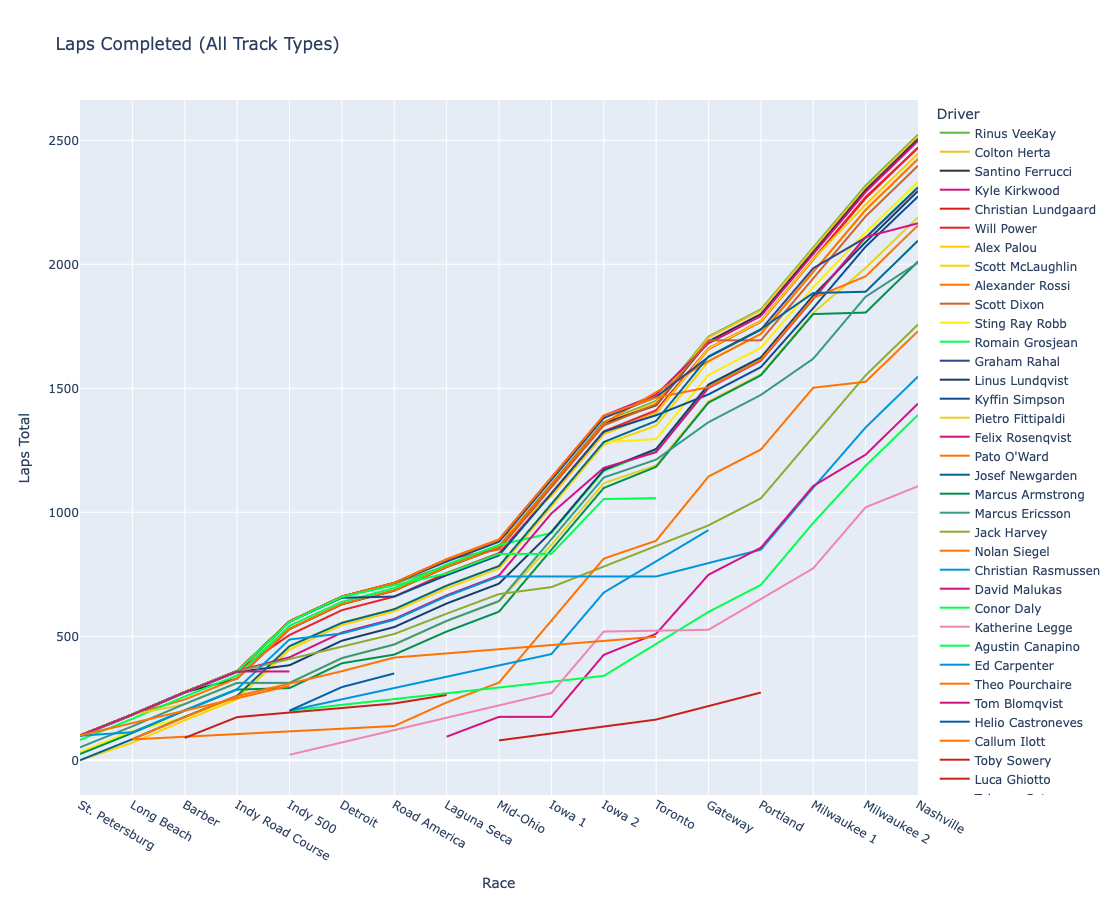

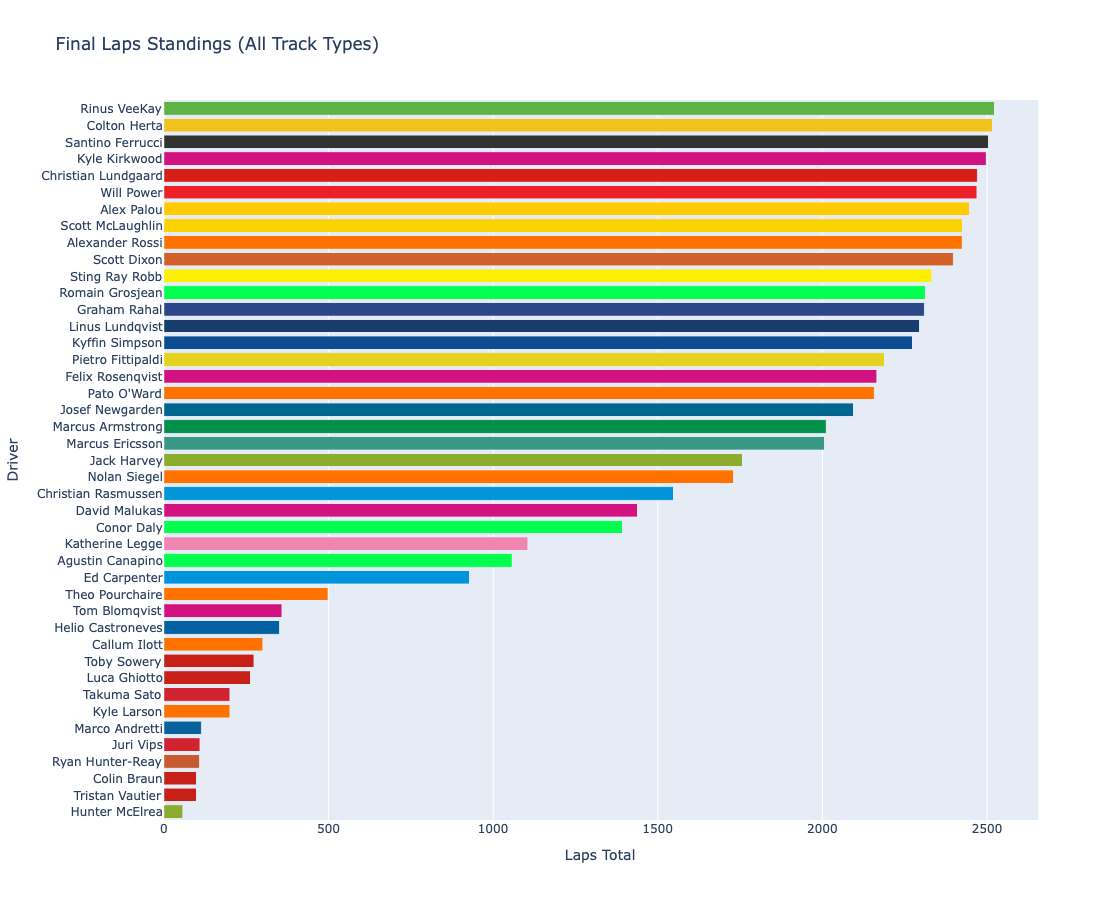

In [30]:
race_result_df_sorted_all_tracks = race_result_df_sorted.copy()

# Calculate the total laps completed for each driver
race_result_df_sorted_all_tracks['Laps Total'] = race_result_df_sorted_all_tracks.groupby('Driver')['Laps'].cumsum()

# Ranki drivers based on laps completed in each race
race_result_df_sorted_all_tracks['Laps Rank'] = race_result_df_sorted_all_tracks.groupby('Race')['Laps Total'].rank(method='min', ascending=False).astype('int')

#Total laps completed by each driver across all races
total_laps_all_tracks = race_result_df_sorted_all_tracks.groupby('Driver')['Laps Total'].max().reset_index().sort_values(by='Laps Total', ascending=False)
total_laps_all_tracks['Championship Rank'] = total_laps_all_tracks['Laps Total'].rank(method='min', ascending=False).astype('int')
total_laps_all_tracks['Championship Result'] = total_laps_all_tracks['Championship Rank']
total_laps_all_tracks.set_index('Championship Rank', inplace=True)
championship_rank_all_tracks = total_laps_all_tracks['Driver'].tolist()

# Graph for total laps completed
graph_official_laps = px.line(race_result_df_sorted_all_tracks, 
              x='Race', 
              y='Laps Total', 
              color='Driver', 
              title='Laps Completed (All Track Types)', 
              height=900, 
              color_discrete_map=driver_car_colors, 
              category_orders={'Driver': championship_rank_all_tracks}, 
              hover_data=['Laps Rank', 'Race Number'])

# Bar chart for final laps standings
bar_official_laps = px.bar(total_laps_all_tracks, 
              y='Driver', 
              x='Laps Total', 
              color='Driver',
              title='Final Laps Standings (All Track Types)', 
              color_discrete_map=driver_car_colors, 
              height=900, 
              hover_data=['Championship Result'])

bar_official_laps.update_layout(showlegend=False)

# Show all figures
graph_official_laps.show()
bar_official_laps.show()

In [ ]:
race_result_df_sorted_all_tracks = race_result_df_sorted.copy()

# Calculate the total pit stops completed for each driver
race_result_df_sorted_all_tracks['Pit Stops'] = race_result_df_sorted_all_tracks.groupby('Pit Stop')['Laps'].cumsum()


#Total pit stops completed by each driver across all races
total_pit_stop_all_tracks = race_result_df_sorted_all_tracks.groupby('Driver')['Pit Stops'].max().reset_index().sort_values(by='Pit Stops', ascending=False)
total_pit_stop_all_tracks['Championship Rank'] = total_laps_all_tracks['Pit Stops'].rank(method='min', ascending=False).astype('int')
total_pit_stop_all_tracks['Championship Result'] = total_laps_all_tracks['Championship Rank']
total_pit_stop_all_trackss.set_index('Championship Rank', inplace=True)
championship_rank_all_tracks = total_laps_all_tracks['Driver'].tolist()

# Graph for total laps completed
graph_official_laps = px.line(race_result_df_sorted_all_tracks, 
              x='Race', 
              y='Pit Stops', 
              color='Driver', 
              title='Pit Stops Completed (All Track Types)', 
              height=900, 
              color_discrete_map=driver_car_colors, 
              category_orders={'Driver': championship_rank_all_tracks}, 
              hover_data=['Laps Rank', 'Race Number'])

# Bar chart for final laps standings
bar_official_laps = px.bar(total_laps_all_tracks, 
              y='Driver', 
              x='Laps Total', 
              color='Driver',
              title='Final Laps Standings (All Track Types)', 
              color_discrete_map=driver_car_colors, 
              height=900, 
              hover_data=['Championship Result'])

bar_official_laps.update_layout(showlegend=False)

# Show all figures
graph_official_laps.show()
bar_official_laps.show()

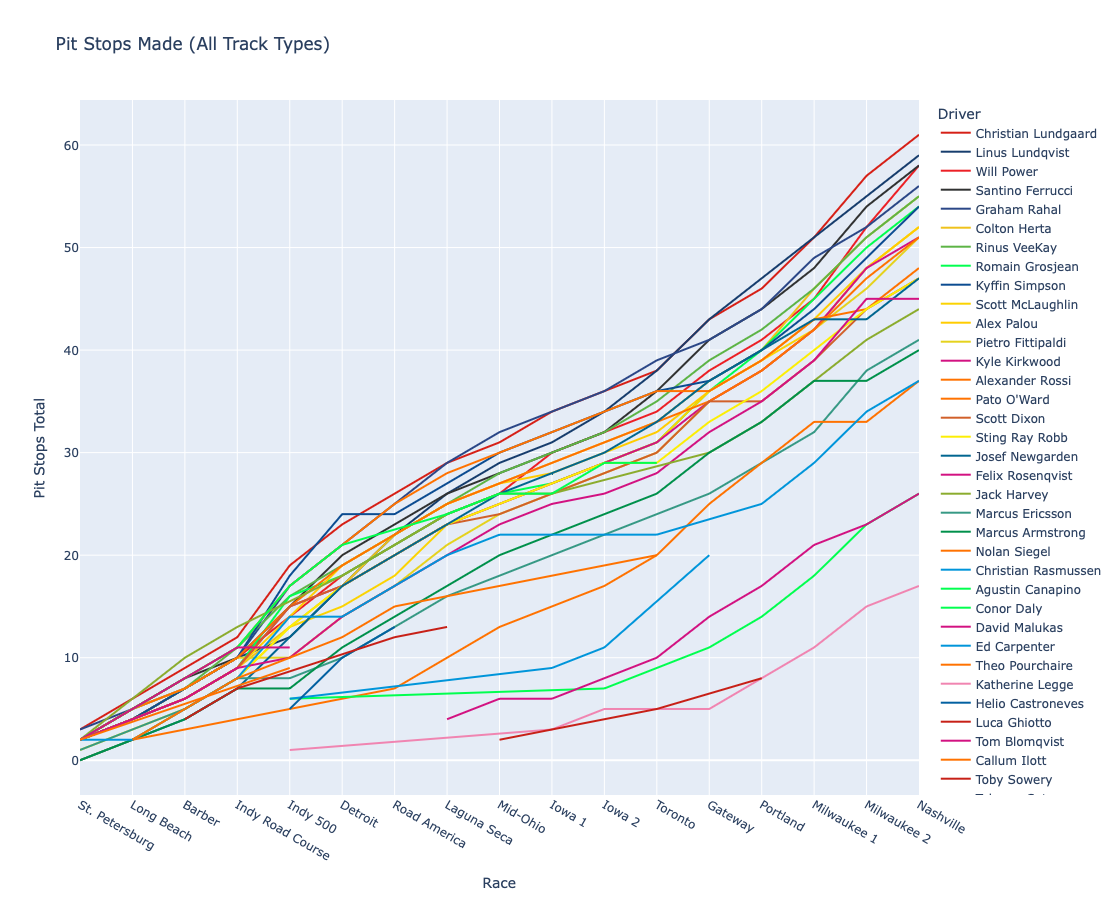

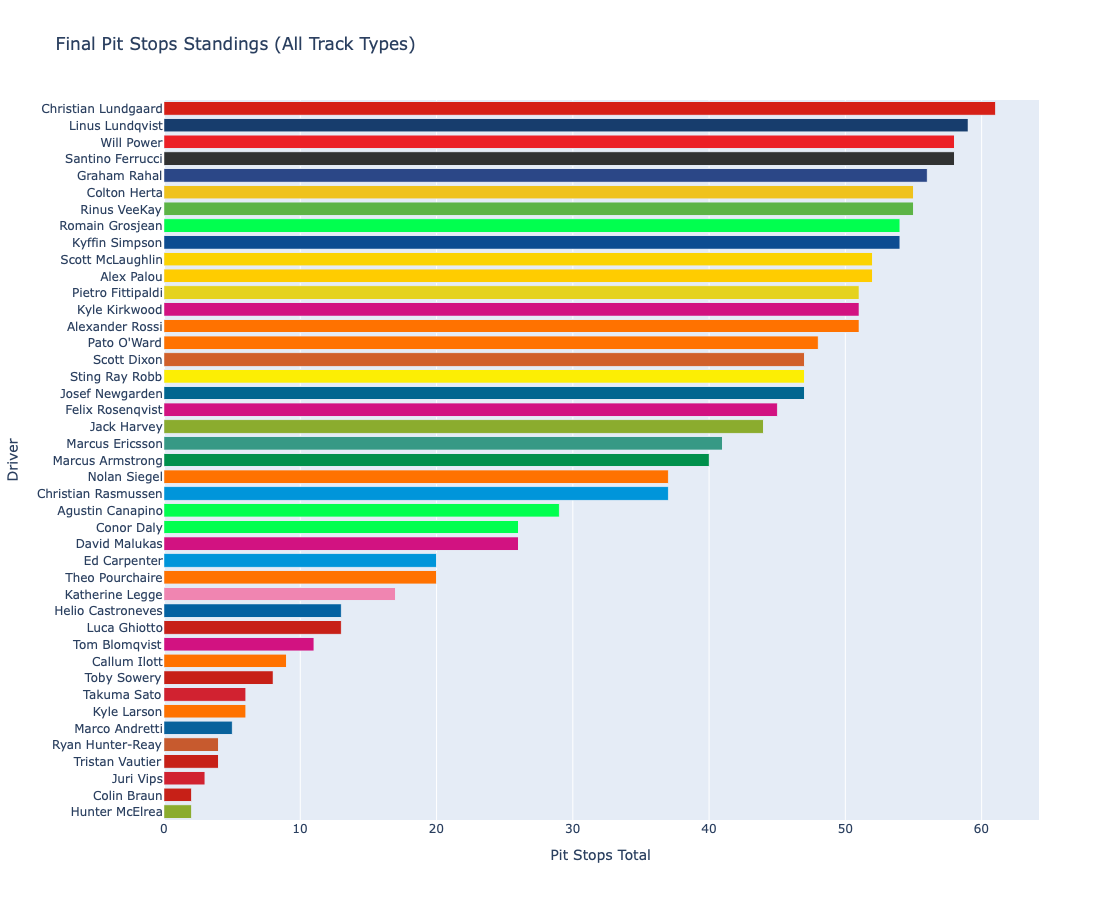

In [36]:
# Assuming race_result_df_sorted is your original DataFrame
race_result_df_sorted_all_tracks = race_result_df_sorted.copy()

# Calculate the total pit stops for each driver
race_result_df_sorted_all_tracks['Pit Stops Total'] = race_result_df_sorted_all_tracks.groupby('Driver')['Pit stop'].cumsum()

# Ranking drivers based on pit stops in each race
race_result_df_sorted_all_tracks['Pit Stops Rank'] = race_result_df_sorted_all_tracks.groupby('Race')['Pit Stops Total'].rank(method='min', ascending=False).astype('int')

# Prepare the total pit stops made by each driver across all races
total_pit_stops_all_tracks = race_result_df_sorted_all_tracks.groupby('Driver')['Pit Stops Total'].max().reset_index().sort_values(by='Pit Stops Total', ascending=False)
total_pit_stops_all_tracks['Championship Rank'] = total_pit_stops_all_tracks['Pit Stops Total'].rank(method='min', ascending=False).astype('int')
total_pit_stops_all_tracks['Championship Result'] = total_pit_stops_all_tracks['Championship Rank']
total_pit_stops_all_tracks.set_index('Championship Rank', inplace=True)
championship_rank_all_tracks = total_pit_stops_all_tracks['Driver'].tolist()

# Graph for total pit stops made
graph_official_pit_stops = px.line(race_result_df_sorted_all_tracks, 
              x='Race', 
              y='Pit Stops Total', 
              color='Driver', 
              title='Pit Stops Made (All Track Types)', 
              height=900, 
              color_discrete_map=driver_car_colors, 
              category_orders={'Driver': championship_rank_all_tracks}, 
              hover_data=['Pit Stops Rank', 'Race Number'])


# Bar chart for final pit stops standings
bar_official_pit_stops = px.bar(total_pit_stops_all_tracks, 
              y='Driver', 
              x='Pit Stops Total', 
              color='Driver',
              title='Final Pit Stops Standings (All Track Types)', 
              color_discrete_map=driver_car_colors, 
              height=900, 
              hover_data=['Championship Result'])

bar_official_pit_stops.update_layout(showlegend=False)

# Show all figures
graph_official_pit_stops.show()
bar_official_pit_stops.show()